## NLP Class Assignment 3

In [156]:
import pandas as pd
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import re
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from itertools import combinations
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk import ngrams

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [157]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(10)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."
2,https://www.ktre.com/prnewswire/2022/06/07/syncron-price-selected-by-mitsubishi-motors-corporation-boost-enhanced-service-parts-pricing-strategy/,2022-06-07,en,Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing Strategy,"Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing StrategySkip to contentCircle - Country Music & LifestyleAdvertise With UsTeacher TributeAsk The ExpertThank A NurseBe ExcellentWatch LiveNewsElectionsVaccine TrackerVideoWeatherSportsCommunityContestsAbout UsCOVID-19SearchHomeSee it, Snap it, Send itNewsStorm of the CenturyNationalStateEditorialInvestigateEast Texas Ag NewsCrimeEast Texas NowThe Next NormalSept 11thWeatherSign Up for ThunderCallL..."
3,https://www.motoroids.com/news/mahindra-teases-its-future-electric-lineup/,2022-02-14,en,Mahindra Teases Its Future Electric Lineup! | Motoroids,Mahindra Teases Its Future Electric Lineup! | Motoroids Motoroids BlogMotoroids Forum AuthorsContact usSubmit storyAdvertise with usPrivacy Policy Search HomeAuto NewsFeaturesLaunchesUpcoming CarsUpcoming SUVsUpcoming BikesRecent LaunchesReviewsModsModified BikesModified CarsInteresting / Off-beatLists100cc Bikes110cc Bikes125cc Bikes150cc Bikes160cc Bikes200cc Bikes250cc Bikes300cc – 350cc BikesBikes In IndiaCars in IndiaForums Trending: Triumph Trident 660 Gets Pricier! HomeNewsMahindra Te...
4,https://auto.hindustantimes.com/jawa-bikes/dealers/vadodara,2022-01-07,en,Jawa Bikes Car Dealers - Jawa Bikes Showrooms in India,"Jawa Bikes Car Dealers - Jawa Bikes Showrooms in India Explore Saturday, 8 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar News..."
5,https://auto.hindustantimes.com/mahindra-cars/e2oplus/offers-in-darjeeling,2022-03-15,en,Mahindra E2o-plus Car Discount Offers in Darjeeling for March 2022,"Mahindra E2o-plus Car Discount Offers in Darjeeling for March 2022 Explore Tuesday, 15 March 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDeale

In [160]:
news_df['title'].head(10)

0                                                        Lml Bikes Car Dealers - Lml Bikes Showrooms in India
1                                                Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India
2    Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing Strategy
3                                                     Mahindra Teases Its Future Electric Lineup! | Motoroids
4                                                      Jawa Bikes Car Dealers - Jawa Bikes Showrooms in India
5                                          Mahindra E2o-plus Car Discount Offers in Darjeeling for March 2022
6                                                 Ex-Nissan US exec Kelly gets suspended sentence, to go home
7                                                   BMW M3 vs Audi RS3: 4WD sports saloons face off | Autocar
8                                                            \r \tEuropean Shares Climb On Earnings Boost \r 
9         

#### Read Tweets data

In [161]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(10)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0"
4,1493777143347630086,en,2022-02-16,Andile Xaba 🇿🇦,RT,Take a selfie with the New #Renault #ClioV and WIN R1000 fuel voucher 💥 tag @tableviewrenault &amp; #renaulttableviewcliov random winner announced 28.02.2022 @BradAtRenault 0825662336 to book a test drive 🇿🇦 https://t.co/D7V2GnJa8B
5,1542804207560019969,en,2022-07-01,Pendle Slot Racing,,"New Fly Renault 5 Turbo Rallye Monte-Carlo 1983/1985 special edition #slotcar set. Includes the No.9 car of Ragnotti/Andrie - 1983 Rallye Monte-Carlo, plus the snow effect No.10 car of Snobeck/Bechu - 1985 Rallye Monte-Carlo. https://t.co/uDOeljcHcV https://t.co/mSisBugCN4"
6,1534778811291684865,en,2022-06-09,Vickie L. Caldwell,RT,"Just Inspector Renault, the media professes to be shocked—shocked!—that top Democrats are involved in coordinated illegal ballot trafficking!"
7,1483588131173634048,en,2022-01-18,automobilsport,,3D sketching: a digital touch to every drawing - https://t.co/dIrCFvHGIT https://t.co/KjbM6xqctH photos Renault #renault #3dmodeling #3Danimation #3d #Sketching #sketch #projects #modelling #future #technology #designers #drawing #vrheadset #VR #creation #Automotivedesign #cars https://t.co/NzY3idDN3U
8,1540738855350833154,en,2022-06-25,"Hoses and Clamps,",,Silicone Radiator Hose Pipe +Clamps Fit For Renault 5GT R5 Turbo Super 1.4L Blue https://t.co/BCwYJCWZQn eBay https://t.co/CWeRrvdAvZ
9,1494617602248908800,en,2022-02-18,UK HAULIER,,Chosen Few: Four More Renault Trucks C Tippers for J T Few Plant Hire LTD\n\n@RenaultTrucksUK @JTFewPlantHire \n\n#Trucks #RenaultTrucks #Renault #Supplied \n\nhttps://t.co/TpnOzX2TZt


# Data cleaning

In [162]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stopwords_set = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to clean and tokenize text
def process_text(text, remove_stopwords=True, perform_lemmatization=True):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    
    # Remove newline characters
    text = text.replace('\n', ' ')
    
    # Remove hashtags
    text = re.sub(r'#\S+', ' ', text)
    
    # Tokenize words
    tokens = word_tokenize(text)
    
    # Remove punctuation and non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stop words if specified
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stopwords_set]
    
    # Perform stemming or lemmatization if specified
    if perform_lemmatization:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    else:
        tokens = [stemmer.stem(token) for token in tokens]
    
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [163]:
# Apply text processing to 'text' column
news_df['cleaned text'] = news_df['text'].apply(process_text)
tweets_df['cleaned text'] = tweets_df['text'].apply(process_text)
news_df.head()

,url,date,language,title,text,cleaned text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...",lml bike car dealer lml bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy read ...
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar...",pure ev bike car dealer pure ev bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrending...
2,https://www.ktre.com/prnewswire/2022/06/07/syncron-price-selected-by-mitsubishi-motors-corporation-boost-enhanced-service-parts-pricing-strategy/,2022-06-07,en,Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing Strategy,"Syncron Price Selected by Mitsubishi Motors Corporation to Boost Enhanced Service Parts Pricing StrategySkip to contentCircle - Country Music & LifestyleAdvertise With UsTeacher TributeAsk The ExpertThank A NurseBe ExcellentWatch LiveNewsElectionsVaccine TrackerVideoWeatherSportsCommunityContestsAbout UsCOVID-19SearchHomeSee it, Snap it, Send itNewsStorm of the CenturyNationalStateEditorialInvestigateEast Texas Ag NewsCrimeEast Texas NowThe Next NormalSept 11thWeatherSign Up for ThunderCallL...",syncron price selected mitsubishi motor corporation boost enhanced service part pricing strategyskip contentcircle country music lifestyleadvertise usteacher tributeask expertthank nursebe excellentwatch livenewselectionsvaccine trackervideoweathersportscommunitycontestsabout snap send itnewsstorm centurynationalstateeditorialinvestigateeast texas ag newscrimeeast texas nowthe next normalsept thundercalllake levelsproject tornadometeorology minutesportscowboys camplocalnationalscoreboardthe ...
3,https://www.motoroids.com/news/mahindra-teases-its-future-electric-lineup/,2022-02-14,en,Mahindra Teases Its Future Electric Lineup! | Motoroids,Mahindra Teases Its Future Electric Lineup! | Motoroids Motoroids BlogMotoroids Forum AuthorsContact usSubmit storyAdvertise with usPrivacy Policy Search HomeAuto NewsFeaturesLaunchesUpcoming CarsUpcoming SUVsUpcoming BikesRecent LaunchesReviewsModsModified BikesModified C

In [164]:
# tweets_df
tweets_df.head()

,id,lang,date,name,retweeted,text,cleaned text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,straight swap renault twingo extreme awesome
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN",australian gp qualifying melbourne march grid row eddie irvine ferrari mika hakkinen row johnny herbert jean alesi
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU,think blood thousand ukrainian woman child pouring every renault car
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0",almost worker russia still western payroll mcdonald ikea renault levi strauss amp others pay salary thousand employee operation suspended yum brand kfc confirm still
4,1493777143347630086,en,2022-02-16,Andile Xaba 🇿🇦,RT,Take a selfie with the New #Renault #ClioV and WIN R1000 fuel voucher 💥 tag @tableviewrenault &amp; #renaulttableviewcliov random winner announced 28.02.2022 @BradAtRenault 0825662336 to book a test drive 🇿🇦 https://t.co/D7V2GnJa8B,take selfie new win fuel voucher tag amp random winner announced book test drive


In [165]:
# Function to create n-grams
def create_ngrams(text, n):
    tokens = word_tokenize(text)
    ngrams_list = list(ngrams(tokens, n))
    return [' '.join(ngram) for ngram in ngrams_list]

In [166]:
# Selecting n for news articles
news_n_values = [1, 2, 3, 4, 5, 6 ,7]
news_ngram_counts = []

for n in news_n_values:
    news_df[f'ngram_{n}'] = news_df['cleaned text'].apply(lambda x: create_ngrams(x, n))
    ngram_count = news_df[f'ngram_{n}'].explode().nunique()
    news_ngram_counts.append(ngram_count)


# Visualize the selection of “n” for News

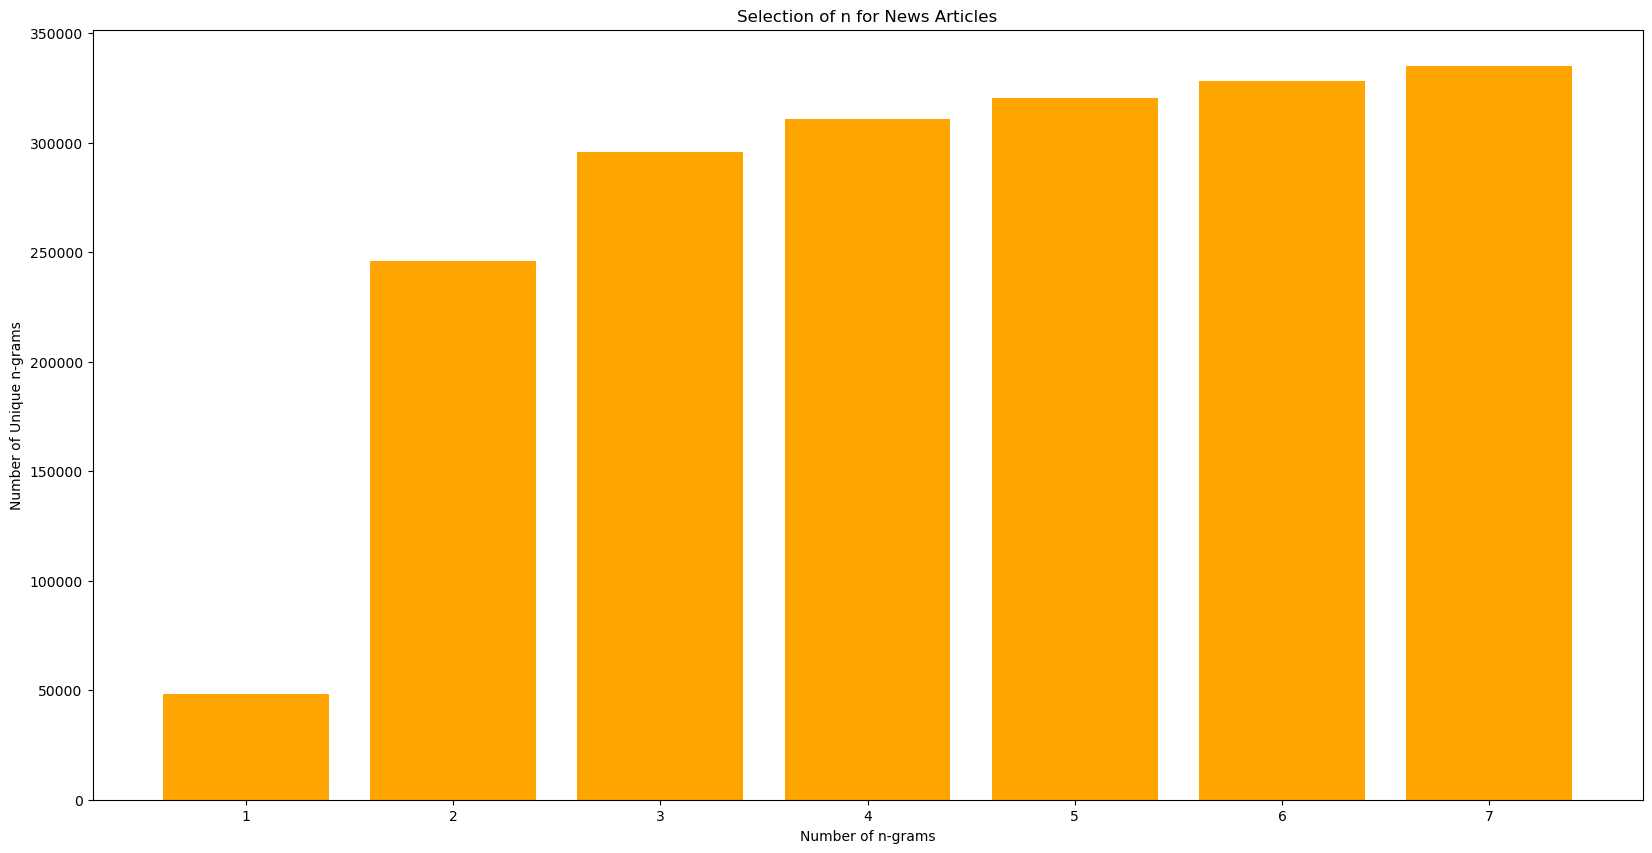

In [168]:
# Visualization of the selection of n for news articles
plt.figure(figsize=(20, 10))
plt.bar(news_n_values, news_ngram_counts, color = 'orange')
plt.xlabel('Number of n-grams')
plt.ylabel('Number of Unique n-grams')
plt.title('Selection of n for News Articles')
plt.show()

In [169]:
# Selecting n for tweets
tweet_n_values = [1, 2, 3, 4, 5]
tweet_ngram_counts = []

for n in tweet_n_values:
    tweets_df[f'ngram_{n}'] = tweets_df['cleaned text'].apply(lambda x: create_ngrams(x, n))
    ngram_count = tweets_df[f'ngram_{n}'].explode().nunique()
    tweet_ngram_counts.append(ngram_count)

# Visualize the selection of “n” for Tweets

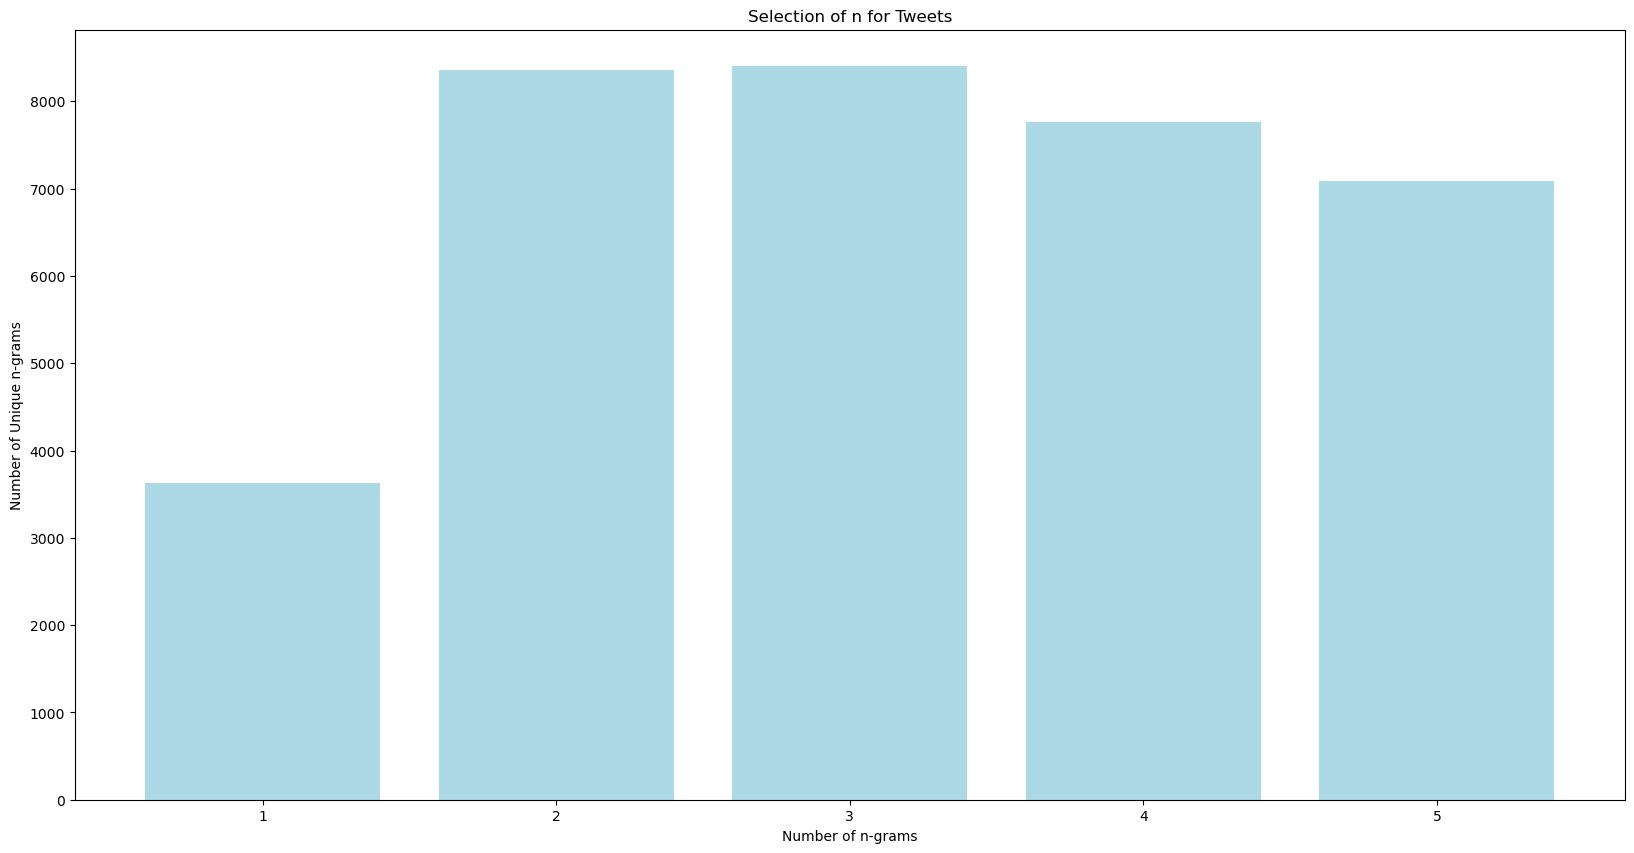

In [170]:
# Visualization of the selection of n for tweets
plt.figure(figsize=(20, 10))
plt.bar(tweet_n_values, tweet_ngram_counts, color = 'lightblue')
plt.xlabel('Number of n-grams')
plt.ylabel('Number of Unique n-grams')
plt.title('Selection of n for Tweets')
plt.show()

# Brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
### As plot shown above, we counted unique n-grams for each value of n because we think it can helps in finding the optimal number of n-grams by providing insights into the diversity and informativeness of the n-grams at different levels.
### By examining the number of unique n-grams, we could gain an idea of how diverse the information is. And we observed a rapid increase in the number of unique n-grams as "n" increases, indicating that longer sequences are capturing more diverse information. However, it is important to note that there's always a trade-off between capturing context and avoiding sparsity. Large values of "n" can lead to sparsity issues, especially if the text content is not very large. Too many unique n-grams may result in overfitting, where we might capture noise rather than meaningful patterns. Based on the considertaion amentioned, we therefore can pick n value equal to 3 for articles and 2 for Tweets.

# Was the “n” identical or different for articles vs. tweets and why?
### the n for articles and Tweets are different, and we think it makes much sense because articles typically have more texts/words in their contents, which tend to need more ngrams to caputure the diverse information within. On the other hand, tweets are usually short. If we use as many ngram value as we do for articles, the sparsity issue may appear and we wouldn't find patterns in the contents.

# For the news articles, please explain why you chose text or title or both text + title combined
### We only used text column as our analysis. We observed that text column already combine title information and text information, so there's no need to create another column to combine them. Also we think some articles may share same titles but have different content, so we think finding pattern only based on articles' titles could be biased.

In [171]:
news_df.head(5)

,url,date,language,title,text,cleaned text,ngram_1,ngram_2,ngram_3,ngram_4,ngram_5,ngram_6,ngram_7
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik...",lml bike car dealer lml bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy read ...,"[lml, bike, car, dealer, lml, bike, showroom, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, medium, limited, right, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, newspho...","[lml bike, bike car, car dealer, dealer lml, lml bike, bike showroom, showroom india, india explore, explore friday, friday january, january log, log searchnotificationstop, searchnotificationstop sectionsauto, sectionsauto newscar, newscar newsbike, newsbike newslatestauto, newslatestauto newsphotosvideoselectric, newsphotosvideoselectric vehiclestrendingmy, vehiclestrendingmy readsoffersnewfind, readsoffersnewfind carsfind, carsfind bikescompare, bikescompare carscompare, carscompare bikes...","[lml bike car, bike car dealer, car dealer lml, dealer lml bike, lml bike showroom, bike showroom india, showroom india explore, india explore friday, explore friday january, friday january log, january log searchnotificationstop, log searchnotificationstop sectionsauto, searchnotificationstop sectionsauto newscar, sectionsauto newscar newsbike, newscar newsbike newslatestauto, newsbike newslatestauto newsphotosvideoselectric, newslatestauto newsphotosvideoselectric vehiclestrendingmy, newsp...","[lml bike car dealer, bike car dealer lml, car dealer lml bike, dealer lml bike showroom, lml bike showroom india, bike showroom india explore, showroom india explore friday, india explore friday january, explore friday january log, friday january log searchnotificationstop, january log searchnotificationstop sectionsauto, log searchnotificationstop sectionsauto newscar, searchnotificationstop sectionsauto newscar newsbike, sectionsauto newscar newsbike newslatestauto, newscar newsbike newsl...","[lml bike car dealer lml, bike car dealer lml bike, car dealer lml bike showroom, dealer lml bike showroom india, lml bike showroom india explore, bike showroom india explore friday, showroom india explore friday january, india explore friday january log, explore friday january log searchnotificationstop, friday january log searchnotificationstop sectionsauto, january log searchnotificationstop sectionsauto newscar, log searchnotificationstop sectionsauto newscar newsbike, searchnotification...","[lml bike car dealer lml bike, bike car dealer lml bike showroom, car dealer lml bike showroom india, dealer lml bike showroom india explore, lml bike showroom india explore friday, bike showroom india explore friday january, showroom india explore friday janu

# Which news articles / tweets were similar and which ones were dissimilar?

# Similarity for News

In [228]:
# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0

# Function to find similar news articles based on Jaccard similarity
def find_similar_articles(df, ngram_column, threshold):
    similar_articles = []
    count = 0
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            ngrams1 = set(df.loc[i, ngram_column])
            ngrams2 = set(df.loc[j, ngram_column])

            similarity = jaccard_similarity(ngrams1, ngrams2)

            if similarity > threshold:
                common_ngrams = ngrams1.intersection(ngrams2)
                similar_articles.append((i, j, similarity, common_ngrams))
                count += 1

                if count >= 5:  # Adjust the number as needed
                    break

        if count >= 10:  # Adjust the number as needed
            break

    return similar_articles

# Example usage for news_df
similar_articles_text = find_similar_articles(news_df, 'ngram_3', 0.8)

# Output similar text with common n-grams for news_df
for index1, index2, similarity, common_ngrams in similar_articles_text:
    print(f"News Article #{index1} is similar to News Article #{index2} with Jaccard Similarity: {similarity}")


News Article #0 is similar to News Article #141 with Jaccard Similarity: 0.8486842105263158
News Article #0 is similar to News Article #197 with Jaccard Similarity: 0.8129032258064516
News Article #0 is similar to News Article #368 with Jaccard Similarity: 0.8129032258064516
News Article #0 is similar to News Article #539 with Jaccard Similarity: 0.8657718120805369
News Article #0 is similar to News Article #574 with Jaccard Similarity: 0.8129032258064516
News Article #1 is similar to News Article #65 with Jaccard Similarity: 0.9166666666666666
News Article #4 is similar to News Article #122 with Jaccard Similarity: 0.918918918918919
News Article #5 is similar to News Article #10 with Jaccard Similarity: 0.8823529411764706
News Article #9 is similar to News Article #20 with Jaccard Similarity: 0.8959537572254336
News Article #10 is similar to News Article #109 with Jaccard Similarity: 0.8888888888888888


# More details among similar News Articles

In [227]:
for index1, index2, similarity, common_ngrams in similar_articles_text:
    print(f"News Article #{index1} is similar to News Article #{index2} with Jaccard Similarity: {similarity}")
    print(f"  News Article #{index1}: {news_df.loc[index1, 'cleaned text']}")
    print(f"  News Article #{index2}: {news_df.loc[index2, 'cleaned text']}")
    print(f"  Common n-grams: {common_ngrams}\n")

News Article #0 is similar to News Article #141 with Jaccard Similarity: 0.8486842105263158
  News Article #0: lml bike car dealer lml bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy read home find car car dealer showroom indialml bike car dealer showroom bodh gayasearch car dealer near lml bike dealer found bodh gayatrending carssee allkia cc petrol manual lakh onwardsget priceadd comparemaruti suzuki cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardsget priceadd compa

# Similarity for Tweets

In [175]:
tweets_df.head(5)

,id,lang,date,name,retweeted,text,cleaned text,ngram_1,ngram_2,ngram_3,ngram_4,ngram_5
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥,straight swap renault twingo extreme awesome,"[straight, swap, renault, twingo, extreme, awesome]","[straight swap, swap renault, renault twingo, twingo extreme, extreme awesome]","[straight swap renault, swap renault twingo, renault twingo extreme, twingo extreme awesome]","[straight swap renault twingo, swap renault twingo extreme, renault twingo extreme awesome]","[straight swap renault twingo extreme, swap renault twingo extreme awesome]"
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN",australian gp qualifying melbourne march grid row eddie irvine ferrari mika hakkinen row johnny herbert jean alesi,"[australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi]","[australian gp, gp qualifying, qualifying melbourne, melbourne march, march grid, grid row, row eddie, eddie irvine, irvine ferrari, ferrari mika, mika hakkinen, hakkinen row, row johnny, johnny herbert, herbert jean, jean alesi]","[australian gp qualifying, gp qualifying melbourne, qualifying melbourne march, melbourne march grid, march grid row, grid row eddie, row eddie irvine, eddie irvine ferrari, irvine ferrari mika, ferrari mika hakkinen, mika hakkinen row, hakkinen row johnny, row johnny herbert, johnny herbert jean, herbert jean alesi]","[australian gp qualifying melbourne, gp qualifying melbourne march, qualifying melbourne march grid, melbourne march grid row, march grid row eddie, grid row eddie irvine, row eddie irvine ferrari, eddie irvine ferrari mika, irvine ferrari mika hakkinen, ferrari mika hakkinen row, mika hakkinen row johnny, hakkinen row johnny herbert, row johnny herbert jean, johnny herbert jean alesi]","[australian gp qualifying melbourne march, gp qualifying melbourne march grid, qualifying melbourne march grid row, melbourne march grid row eddie, march grid row eddie irvine, grid row eddie irvine ferrari, row eddie irvine ferrari mika, eddie irvine ferrari mika hakkinen, irvine ferrari mika hakkinen row, ferrari mika hakkinen row johnny, mika hakkinen row johnny herbert, hakkinen row johnny herbert jean, row johnny herbert jean alesi]"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU,think blood thousand ukrainian woman child pouring every renault car,"[think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car]","[think blood, blood thousand, thousand ukrainian, ukrainian woman, woman child, child pouring, pouring every, every renault, renault car]","[think blood thousand, blood thousand ukrainian, thousand ukrainian woman, ukrainian woman child, woman child pouring, child pouring every, pouring every renault, every renault car]","[think blood thousand ukrainian, blood thousand ukrainian woman, thousand ukrainian woman child, ukrainian woman child pouring, woman child pouring every, child pouring every renault, pouring every renault car]","[think blood thousand ukrainian woman, blood thousand ukrainian woman child, thousand ukrainian woman child pouring, ukrainian woman child pouring every, woman child pouring every renault, child pouring every renault car]"
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands

In [226]:
# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0

# Function to find similar tweets based on Jaccard similarity
def find_similar_tweets(df, ngram_column, threshold):
    similar_tweets = []
    count = 0
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            ngrams1 = set(df.loc[i, ngram_column])
            ngrams2 = set(df.loc[j, ngram_column])

            similarity = jaccard_similarity(ngrams1, ngrams2)

            if similarity > threshold:
                common_ngrams = ngrams1.intersection(ngrams2)
                similar_tweets.append((i, j, similarity, common_ngrams))
                count += 1

                if count >= 2:  # Adjust the number as needed
                    break

        if count >= 10:  # Adjust the number as needed
            break

    return similar_tweets

# Example usage:
similar_tweets_text = find_similar_tweets(tweets_df, 'ngram_2', 0.8)

# Output similar text with common trigrams
for index1, index2, similarity, common_trigrams in similar_tweets_text:
    print(f"Tweet #{index1} is similar to Tweet #{index2} with Jaccard Similarity: {similarity}")

Tweet #3 is similar to Tweet #453 with Jaccard Similarity: 1.0
Tweet #6 is similar to Tweet #38 with Jaccard Similarity: 1.0
Tweet #15 is similar to Tweet #378 with Jaccard Similarity: 0.9
Tweet #22 is similar to Tweet #192 with Jaccard Similarity: 1.0
Tweet #25 is similar to Tweet #95 with Jaccard Similarity: 1.0
Tweet #31 is similar to Tweet #761 with Jaccard Similarity: 1.0
Tweet #32 is similar to Tweet #254 with Jaccard Similarity: 1.0
Tweet #34 is similar to Tweet #114 with Jaccard Similarity: 1.0
Tweet #36 is similar to Tweet #43 with Jaccard Similarity: 1.0
Tweet #38 is similar to Tweet #39 with Jaccard Similarity: 1.0


# More details among similar Tweets

In [225]:
for index1, index2, similarity, common_trigrams in similar_tweets_text:
    print(f"Tweet #{index1} is similar to Tweet #{index2} with Jaccard Similarity: {similarity}")
    print(f"  Tweet #{index1}: {tweets_df.loc[index1, 'cleaned text']}")
    print(f"  Tweet #{index2}: {tweets_df.loc[index2, 'cleaned text']}")
    print(f"  Common trigrams: {common_trigrams}\n")

Tweet #3 is similar to Tweet #453 with Jaccard Similarity: 1.0
  Tweet #3: almost worker russia still western payroll mcdonald ikea renault levi strauss amp others pay salary thousand employee operation suspended yum brand kfc confirm still
  Tweet #453: almost worker russia still western payroll mcdonald ikea renault levi strauss amp others pay salary thousand employee operation suspended yum brand kfc confirm still
  Common trigrams: {'pay salary', 'employee operation', 'thousand employee', 'amp others', 'levi strauss', 'mcdonald ikea', 'yum brand', 'western payroll', 'brand kfc', 'operation suspended', 'strauss amp', 'almost worker', 'confirm still', 'suspended yum', 'kfc confirm', 'payroll mcdonald', 'ikea renault', 'worker russia', 'still western', 'salary thousand', 'others pay', 'renault levi', 'russia still'}

Tweet #6 is similar to Tweet #38 with Jaccard Similarity: 1.0
  Tweet #6: inspector renault medium professes top democrat involved coordinated illegal ballot trafficking


# Disimilarity for News

In [242]:
# Function to find dissimilar news articles based on Jaccard dissimilarity
def find_dissimilar_articles(df, ngram_column, threshold):
    dissimilar_articles = []
    count = 0
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            ngrams1 = set(df.loc[i, ngram_column])
            ngrams2 = set(df.loc[j, ngram_column])

            dissimilarity = 1 - jaccard_similarity(ngrams1, ngrams2)

            if dissimilarity > threshold:
                dissimilar_articles.append((i, j, dissimilarity))
                count += 1

                if count >= 3:  # Adjust the number as needed
                    break

        if count >= 10:  # Adjust the number as needed
            break

    return dissimilar_articles

# Example usage for finding dissimilar news articles
dissimilar_articles_text = find_dissimilar_articles(news_df, 'ngram_3', 0.8)

# Output dissimilar text with dissimilarity values
for index1, index2, dissimilarity in dissimilar_articles_text:
    print(f"News Article #{index1} is dissimilar to News Article #{index2} with Dissimilarity: {dissimilarity}")

News Article #0 is dissimilar to News Article #2 with Dissimilarity: 1.0
News Article #0 is dissimilar to News Article #3 with Dissimilarity: 1.0
News Article #0 is dissimilar to News Article #6 with Dissimilarity: 1.0
News Article #1 is dissimilar to News Article #2 with Dissimilarity: 1.0
News Article #2 is dissimilar to News Article #3 with Dissimilarity: 1.0
News Article #3 is dissimilar to News Article #4 with Dissimilarity: 1.0
News Article #4 is dissimilar to News Article #6 with Dissimilarity: 1.0
News Article #5 is dissimilar to News Article #6 with Dissimilarity: 1.0
News Article #6 is dissimilar to News Article #7 with Dissimilarity: 1.0
News Article #7 is dissimilar to News Article #8 with Dissimilarity: 1.0


# More details among disimilar News articles

In [243]:
for index1, index2, dissimilarity in dissimilar_articles_text:
    print(f"News Article #{index1} is dissimilar to News Article #{index2} with Dissimilarity: {dissimilarity}")
    print(f"  News Article #{index1}: {news_df.loc[index1, 'cleaned text']}")
    print(f"  News Article #{index2}: {news_df.loc[index2, 'cleaned text']}")
    print("\n")

News Article #0 is dissimilar to News Article #2 with Dissimilarity: 1.0
  News Article #0: lml bike car dealer lml bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy read home find car car dealer showroom indialml bike car dealer showroom bodh gayasearch car dealer near lml bike dealer found bodh gayatrending carssee allkia cc petrol manual lakh onwardsget priceadd comparemaruti suzuki cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardsget priceadd comparemahindra cc petro

# Disimilarity for Tweets

In [240]:
# Function to find dissimilar tweets based on Jaccard dissimilarity
def find_dissimilar_tweets(df, ngram_column, threshold):
    dissimilar_tweets = []
    count = 0
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            ngrams1 = set(df.loc[i, ngram_column])
            ngrams2 = set(df.loc[j, ngram_column])

            dissimilarity = 1 - jaccard_similarity(ngrams1, ngrams2)

            if dissimilarity > threshold:
                dissimilar_tweets.append((i, j, dissimilarity))
                count += 1

                if count >= 2:  # Adjust the number as needed
                    break

        if count >= 10:  # Adjust the number as needed
            break

    return dissimilar_tweets

# Example usage for finding dissimilar tweets
dissimilar_tweets_text = find_dissimilar_tweets(tweets_df, 'ngram_3', 0.8)

# Output dissimilar text with dissimilarity values
for index1, index2, dissimilarity in dissimilar_tweets_text:
    print(f"Tweet #{index1} is dissimilar to Tweet #{index2} with Dissimilarity: {dissimilarity}")


Tweet #0 is dissimilar to Tweet #1 with Dissimilarity: 1.0
Tweet #0 is dissimilar to Tweet #2 with Dissimilarity: 1.0
Tweet #1 is dissimilar to Tweet #2 with Dissimilarity: 1.0
Tweet #2 is dissimilar to Tweet #3 with Dissimilarity: 1.0
Tweet #3 is dissimilar to Tweet #4 with Dissimilarity: 1.0
Tweet #4 is dissimilar to Tweet #5 with Dissimilarity: 1.0
Tweet #5 is dissimilar to Tweet #6 with Dissimilarity: 1.0
Tweet #6 is dissimilar to Tweet #7 with Dissimilarity: 1.0
Tweet #7 is dissimilar to Tweet #8 with Dissimilarity: 1.0
Tweet #8 is dissimilar to Tweet #9 with Dissimilarity: 1.0


# More details among disimilar Tweets

In [241]:
for index1, index2, dissimilarity in dissimilar_tweets_text:
    print(f"Tweet #{index1} is dissimilar to Tweet #{index2} with Dissimilarity: {dissimilarity}")
    print(f"  Tweet #{index1}: {news_df.loc[index1, 'cleaned text']}")
    print(f"  Tweet #{index2}: {news_df.loc[index2, 'cleaned text']}")
    print("\n")

Tweet #0 is dissimilar to Tweet #1 with Dissimilarity: 1.0
  Tweet #0: lml bike car dealer lml bike showroom india explore friday january log searchnotificationstop sectionsauto newscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy readsoffersnewfind carsfind bikescompare carscompare bikesemi calculatordealersexplore autoabout uscontact ussitemaprssterms useprivacy policycopyright ht medium limited right carsfind bikescompare carscompare bikesemi calculatordealerscar newsbike newslatestauto newsphotosvideoselectric vehiclestrendingmy read home find car car dealer showroom indialml bike car dealer showroom bodh gayasearch car dealer near lml bike dealer found bodh gayatrending carssee allkia cc petrol manual lakh onwardsget priceadd comparemaruti suzuki cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardscheck latest offersadd comparetata cc petrol manual lakh onwardsget priceadd comparemahindra cc petrol lakh onwardsget pri